In [1]:
# import sys
# sys.path.insert(0, '/Users/chenchen/anaconda2/lib/python2.7/site-packages')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
from pandas.tools.plotting import scatter_matrix

In [2]:
df = pd.read_csv('data.csv', encoding = 'latin-1')
df.describe()

,artist_birth_year,artist_death_year,estimate_high,estimate_low,hammer_price,measurement_depth_cm,measurement_height_cm,measurement_width_cm
count,107578.000000,71186.000000,6.840400e+04,6.840900e+04,1.012540e+05,107578.000000,107578.000000,107578.000000
mean,1916.697011,1979.876352,1.308885e+05,9.323845e+04,8.765909e+04,3.015979,67.641823,65.471063
std,29.645913,27.163922,7.857577e+05,5.450646e+05,5.898940e+05,16.889542,74.558581,70.252308
min,1824.000000,1898.000000,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000
25%,1899.000000,1968.000000,5.000000e+03,4.000000e+03,3.000000e+03,0.000000,28.000000,25.000000
50%,1925.000000,1986.000000,1.500000e+04,1.000000e+04,1.200000e+04,0.000000,51.000000,49.000000
75%,1937.000000,2004.000000,6.000000e+04,4.000000e+04,4.250000e+04,0.000000,84.000000,81.000000
max,1977.000000,2013.000000,6.000000e+07,4.000000e+07,7.850000e+07,899.000000,10993.000000,5225.000000


In [3]:
df.head()
df.currency.unique()

array([u'USD', u'EUR', u'GBP'], dtype=object)

In [4]:
print(df.shape)
df.isnull().sum()

(107578, 18)


artist_birth_year            0
artist_death_year        36392
artist_name                  0
artist_nationality           0
auction_date                 0
category                     0
currency                     0
edition                  94202
estimate_high            39174
estimate_low             39169
hammer_price              6324
location                 17845
materials                 1839
measurement_depth_cm         0
measurement_height_cm        0
measurement_width_cm         0
title                      460
year_of_execution        27760
dtype: int64

In [5]:
# df.hist()
# scatter_matrix(df)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

In [7]:
# ## subsample data
# # print df.currency.unique()
# # print df.artist_name.nunique()
# # print df.category.nunique()
# # print df.materials.nunique()
# # print df.title.nunique()

# print(df.shape)
# # print df.isnull().sum()

# # print(df.auction_date[0:5])

df = df.sample(n = 10000, random_state = 7, axis = 0)

In [8]:
#initialize 
df['auction_year'] = pd.Series([0]*(df.shape[0]), index=df.index)
df['artist_alive_year'] = pd.Series([0]*(df.shape[0]), index=df.index)
df['auction_time_past_death'] = pd.Series([0]*(df.shape[0]), index=df.index)
df['age_of_execution'] = pd.Series([0]*(df.shape[0]), index=df.index)
df['measurement_area'] = pd.Series([0]*(df.shape[0]), index=df.index)
df['measurement_volumn'] = pd.Series([0]*(df.shape[0]), index=df.index)

# process features and create new ones
for i in range(df.shape[0]):
    #interaction term, might not be able to learn from data
    #print(i)
    #print(type(df['currency'].iloc[0]))
    if df['currency'].iloc[i] == 'USD':
        continue
    if df['currency'].iloc[i] == 'EUR':
        df['hammer_price'].iloc[i]= 1.25* df['hammer_price'].iloc[i]
    if df['currency'].iloc[i] == 'GBP':
        df['hammer_price'].iloc[i]= 1.41* df['hammer_price'].iloc[i]
    
    df['auction_year'].iloc[i] = df['auction_date'].iloc[i].split('-')[0]
    df['artist_alive_year'].iloc[i] = float(df['artist_death_year'].iloc[i])- float(df['artist_birth_year'].iloc[i])
    df['auction_time_past_death'].iloc[i] = float(df['auction_year'].iloc[i]) - float(df['artist_death_year'].iloc[i])
    
    
    try:
        if np.isnan(float(df['year_of_execution'].iloc[i])) :
            df['age_of_execution'].iloc[i] = float('nan')
    except ValueError:
        print(i)
        print(df['year_of_execution'].iloc[i])      
    else:
        df['age_of_execution'].iloc[i] = float(df['year_of_execution'].iloc[i]) - float(df['artist_birth_year'].iloc[i])
    
    if df['measurement_depth_cm'].iloc[i] != 0:
        df['measurement_volumn'].iloc[i] = df['measurement_height_cm'].iloc[i] * df['measurement_width_cm'].iloc[i] * df['measurement_depth_cm'].iloc[i] 
    else:
        df['measurement_volumn'].iloc[i] = 0
    
    df['measurement_area'].iloc[i] = df['measurement_height_cm'].iloc[i] * df['measurement_width_cm'].iloc[i]

USD


/Users/chenchen/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


47
			1905
158
			1969
175
			1982
389
			1900
461
British, b.1937
510
			1978
534
			2007
642
			2000
761
			1956
781
			1953
801
			1997
857
			1981
1133
1970-71
1262
			1937
1679
			1950
1871
2005, printed 2006
1875
			1990
2011
			2000
2038
			2000
2161
			2001
2206
			2000
2233
			1950
2478
			2000
2527
			1928
2722
1978-80
2761
			2000
2837
			1988
2853
			2000
2972
			1909
3070
			1960
3120
			1916
3129
			1966
3162
			2000
3211
			1885
3331
Sans titre
3390
			2000
3403
			2000
3487
			2000
3524
			1960
3547
1976-77
3672
			1989
3708
			2000
3927
			1968
3937
c. 1988-94
4153
2003-11
4187
20TH CENTURY
4209
1991-1992
4332
1976-77
4352
			1991
4443
			1941
4524
			1988
4526
			1973
4566
			2000
4773
'63
4908
			1976
5043
1968/1998
5052
			2000
5107
			1959
5249
			1901
5253
1999-2000
5265
			2004
5297
			1973
5325
			1950
5331
signed and dated J Johns '71
5345
			2000
5524
c. 1990
5687
dated 66
5709
			1950
5738
1982-1983
5831
			1990
6127
			2000
6148
2006,
6194
			1997
6266
			19

107178.037183
-1.41
78500000.0


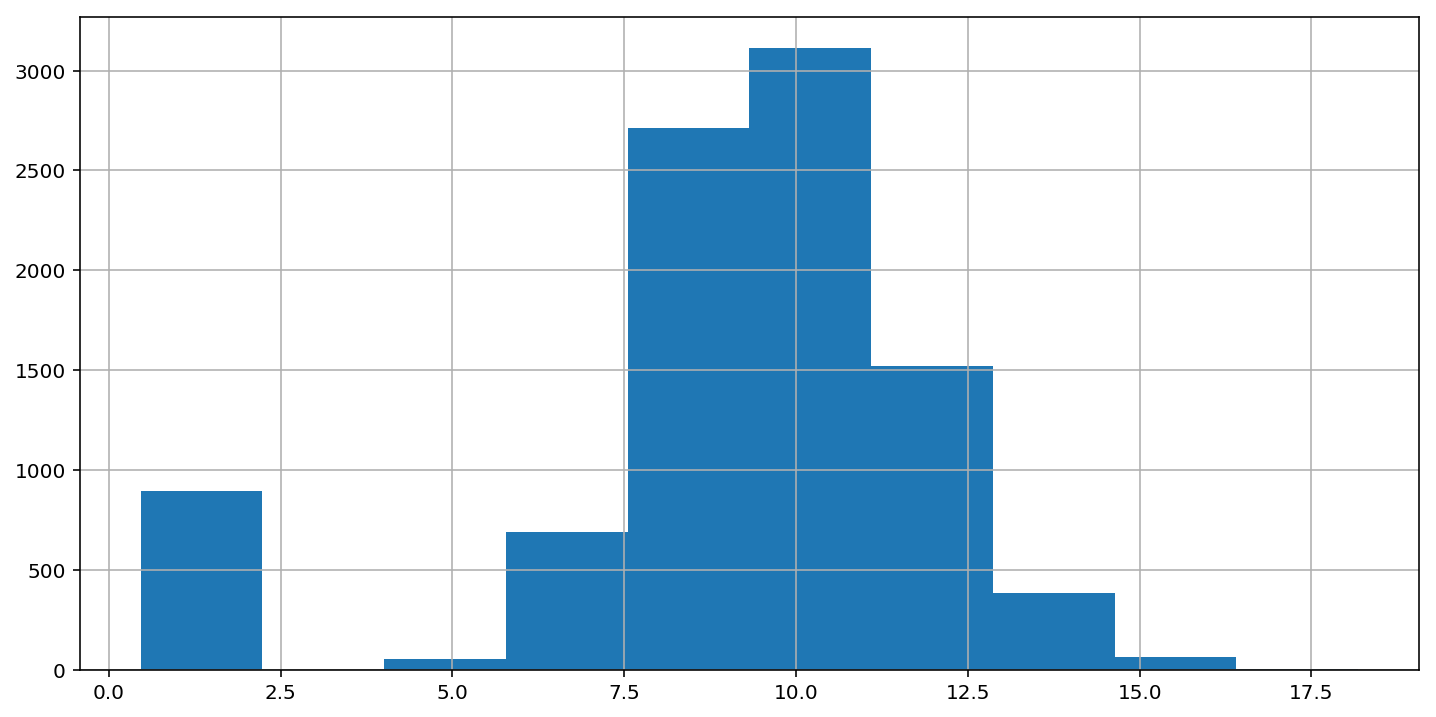

In [9]:
#log transform the target:
print(np.mean(df['hammer_price']))
print(np.min(df['hammer_price']))
print(np.max(df['hammer_price']))

df['hammer_price'] = np.log1p(df['hammer_price'].astype(float)+2)
df['hammer_price'].hist()

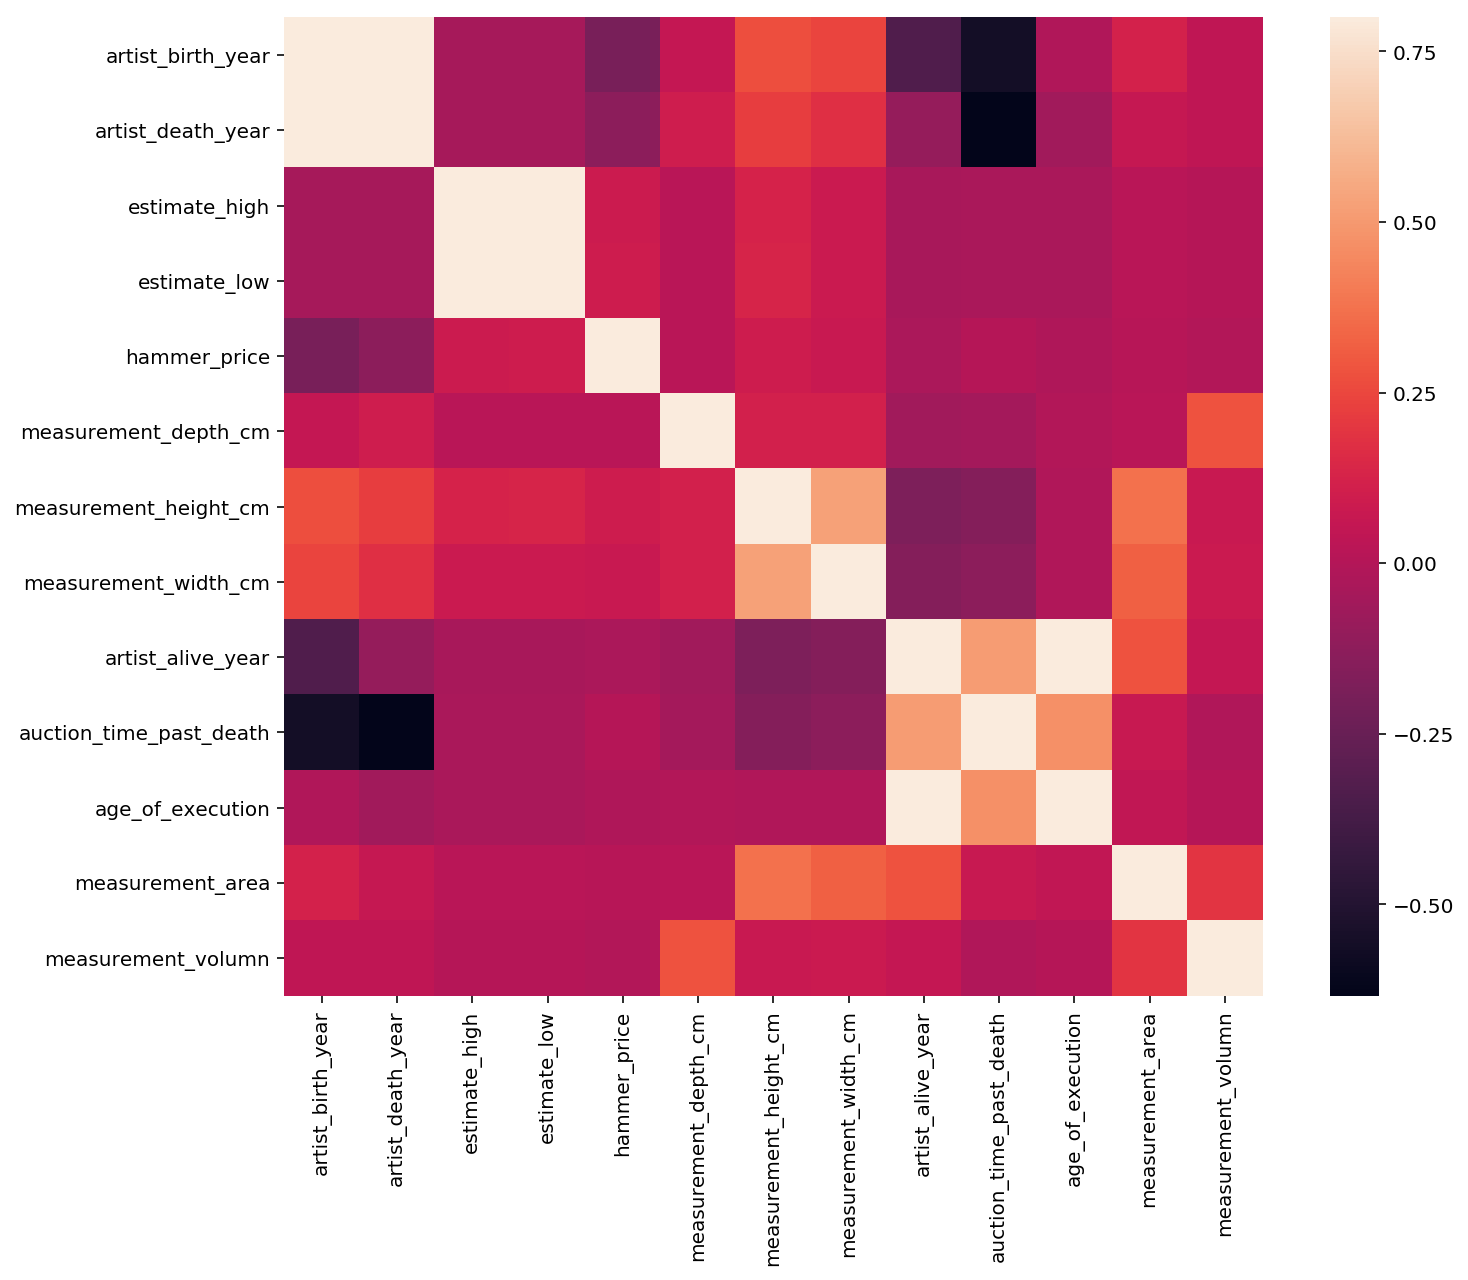

In [10]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#saleprice correlation matrix

# k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'hammer_price')['hammer_price'].index
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [11]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
edition,8813,0.8813
estimate_high,3738,0.3738
estimate_low,3738,0.3738
artist_death_year,3333,0.3333
year_of_execution,2617,0.2617
location,1619,0.1619
age_of_execution,1250,0.1250
artist_alive_year,1075,0.1075
auction_time_past_death,1075,0.1075
hammer_price,574,0.0574


In [12]:
df.dtypes
df.select_dtypes(include=['object'])

,artist_name,artist_nationality,auction_date,category,currency,edition,location,materials,title,year_of_execution,auction_year
86270,Robert Mangold,American,1995-11-15T01:00:00.000Z,Painting,USD,NaN,New York,acrylic and graphite on panel,X Within X,1983,0
68751,Michelangelo Pistoletto,Italian,2007-05-21T00:00:00.000Z,Painting,EUR,NaN,Milan,enamel on mirror,Fractiles,1999,2007
42950,Eric Fischl,American,2005-06-06T00:00:00.000Z,Painting,USD,NaN,New York,Works on Paper,Untitled,1995,0
78803,David Hockney,British,1997-11-04T01:00:00.000Z,Other works on paper,USD,NaN,New York,Prints,The Student-Homage to Picasso,1973,0
8554,Henry Moore,British,2002-06-26T00:00:00.000Z,Sculpture,GBP,NaN,London,Sculpture,Horse,1984,2002
101469,Franz Kline,American,2005-11-08T01:00:00.000Z,Other works on paper,USD,NaN,New York,oil on canvas,Painting in black and white colour,1959,0
8289,Henry Moore,British,1992-12-01T01:00:00.000Z,Other works on paper,GBP,NaN,London,Sculpture,Stringed figure,NaN,1992
50221,Lucio Fontana,Italian,1986-12-04T01:00:00.000Z,(Screen)Print & Gravure,GBP,NaN,London,oil on canvas,spatial concept,NaN,1986
59032,Lucian Freud,British,2006-10-01T20:00:00.000Z,Etching,GBP,signed and numbered 25/50 in pencil,NaN,Etching,Girl holding her foot,1985,2006
35926,Brice Marden,American,2006-11-30T01:00:00.000Z,(Screen)Print & Gravure,EUR,NaN,Cologne,Prints,Untitled,1971,2006


In [ ]:
## check edition column
# for i in range(1000):
#     try:
#         if not np.isnan(float(df['edition'][i])):
#             print(df['edition'][i])
#     except ValueError:
#         print('err ling:'+ str(df['edition'][i])+' price:' +str(df['hammer_price'][i]))
# for i in range(1000):
#     try:
#         if not np.isnan(float(df['location'][i])):
#             print(df['location'][i])
#     except ValueError:
#         print('err ling:'+ str(df['location'][i])+' price:' +str(df['hammer_price'][i]))


df.drop(['edition','auction_date','title'], axis=1)
for i in ['year_of_execution','auction_year']:
    df[i] = pd.to_numeric(df[i], error = 'coerce')
        

			1905
			1931
1980/98
			1969
			1982
			1900
British, b.1937
			1978
			1978
			1970
			2007
1985-1990
			1968
			2000
			2004
			1956
			1953
2002-04
			1997
			1981
1994-95
circa 1950-60
1970-71
			1900
			1981
			1995
			1937
			1908
			1886
			1898
			1950
2005, printed 2006
			1990
2005 and 2006
			2000
			2000
1965-66
			2001
			2000
			1950
			1981
			1971
			2000
1972-74
1991-92
			1928
			1891
1978-80
			2000
			1988
			2000
			1967
			1936
			1909
2002-05
			1960
			1916
			1966
			1996
			2000
			1885
			1976
Sans titre
			1980
			2000
			2000
			1997
			2000
			1960
1976-77
			1989
			2000
			1999
			1968
c. 1988-94
			2007
2003-11
20TH CENTURY
1991-1992
1976-77
			1991
			1977
1991-92
			1941
			1908
			1988
			1973
			2000
			1963
'63
			1976
1968/1998
			2000
			1998
			1959
1982-1983
			1901
1999-2000
			2004
			1973
			1950
signed and dated J Johns '71
			2000
			1923
			1959
			2005
1975-76
c. 1990
2008-2009
			1978
			1930
dated 66
			1950
1983-85
1982-1983
1970-7

In [ ]:

#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])



#filling NA's with the mean of the column:
df =df.fillna(df.mean())

cat_cols = df.select_dtypes(include=['object']).columns
for i in cat_cols: 
    df = df.fillna(df[i].value_counts().index[0])

df = pd.get_dummies(df)

In [ ]:
df.columns
df.dtypes[df.dtypes == "object"]

In [ ]:
# a = pd.DataFrame({'A':['a','b',np.NaN], 'B':[1,0,np.nan]})
# a
# a = pd.get_dummies(a)
# a
# print(len(df.select_dtypes(include=['object']).columns))
df.to_csv('data_processed_sample10000.csv',index = False,encoding = 'latin-1')

In [ ]:
from sklearn.model_selection import train_test_split
X = [i for i in df.columns if i != 'hammer_price']
Y = df.hammer_price
print X[0:5]
print Y[0:5]

# Split our data
train, test, train_labels, test_labels = train_test_split(X, Y,test_size=0.20, random_state=1)

In [ ]:
# random forest model
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt



df = pd.read_csv('data_processed_sample10000.csv')

for i in range(1,100):
    df['X_t'+str(i)] = df['X'].shift(i)

print(df)

df.dropna(inplace=True)


X=pd.DataFrame({ 'X_%d'%i : df['X'].shift(i) for i in range(100)}).apply(np.nan_to_num, axis=0).values


y = df['Y'].values


reg = RandomForestRegressor(criterion='mse')
reg.fit(X,y)
modelPred = reg.predict(X)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)